<div style='font-family: "Times New Roman"'>
    <h1 align="center">Zewail City of Science and Technology</h1>
    <h2 align="center">CSAI 253 - Machine Learning</h2>
    <h3 align="center">Assignment 1: KNN </h3>
</div>

--------------

<h4> Assignemnt main keypoints: </h4>
<ul>
    <li>Download “IRIS” Data set (three flowers) [150 Samples] </li>
    <li>Use PCA to visualize the Dataset (as 2-D) [Optional] </li>
    <li>Divide the data into 80% Training, 20% test [120 , 30 samples] </li>
    <li>Apply KNN with K=3, 5, and 7 on Test Samples. </li>
    <li>Calculate the classification accuracy for each K, Which is the best? </li>
    <li>Normalize the IRIS dataset and repeat steps 4 and 5. Compare </li>
    <li>with previous results, does normalization affect the accuracy ?</li>
<ul>

--------------

### Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Loading the Iris dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

### Exploring the Iris dataset

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
print(f"Duplicate Values --> {iris_df.duplicated().sum()} value(s)")

Duplicate Values --> 1 value(s)


In [8]:
iris_df = iris_df.drop_duplicates()
print(f"duplicate values --> {iris_df.duplicated().sum()} value(s)")

duplicate values --> 0 value(s)


-----------

### Spliting data into Features(X) and Target Values(Y)

In [9]:
X = iris_df.iloc[:, 0:-1]
y = iris_df.iloc[:, -1]

In [10]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

------------

### Dividing the data into 80% Training, 20% test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [13]:
print(f"[-] training set size: {X_train.shape[0]} sample(s).\n[-] test set size: {X_test.shape[0]} sample(s).")

[-] training set size: 119 sample(s).
[-] test set size: 30 sample(s).


------

### Normalizing the dataset

In [14]:
normalizer = Normalizer()
normalizer.fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized  = normalizer.transform(X_test)

In [15]:
print(X_train[0:5])

[[5.2 3.5 1.5 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.9 4.2 1.3]
 [5.6 2.5 3.9 1.1]
 [5.7 3.8 1.7 0.3]]


In [16]:
print(X_train_normalized[0:5])

[[0.80641965 0.54278246 0.23262105 0.03101614]
 [0.75728103 0.3542121  0.52521104 0.15878473]
 [0.73446047 0.37367287 0.5411814  0.16750853]
 [0.76185188 0.34011245 0.53057542 0.14964948]
 [0.8068282  0.53788547 0.24063297 0.04246464]]


---------

# <div style="text-align:center" > Implemeneting KNN from scratch </div>

### 1- Calculating the distance using Eculidean algorithm

In [17]:
def distance_ecu(x_train, x_test_point):
    distances = []
    for i in range(len(x_train)):
        current_distance = 0
        current_train_point = x_train[i]
        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_point[col])**2
        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)
    distances = pd.DataFrame(data=distances, columns=['index'])
    return distances

### 2- Find the nearest neighbors

In [18]:
def nearest_neighbors(distance_point , K):
    df_nearest = distance_point.sort_values(by='index')
    df_nearest = df_nearest.head(K)
    return df_nearest

### 3- Classifying the point based on a majority vote

In [19]:
def voting(df_nearest , y_train):
    counter_vote = Counter(y_train[df_nearest.index])
    y_pred = counter_vote.most_common(1)[0][0]
    return y_pred

### 4- KNN Full Algorithm

In [20]:
def KNN_from_scratch(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distance_point = distance_ecu(x_train, test_point)
        df_nearest_point = nearest_neighbors(distance_point, k)
        y_pred_point = voting(df_nearest_point, y_train)
        y_pred.append(y_pred_point)
    return y_pred

--------------

## <div style="text-align:center" > Testing KNN Implementation Before Normalization </div>

### Applying KNN when k=3

In [21]:
y_pred_scratch_k3 = KNN_from_scratch(X_train, y_train, X_test, 3)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_sklearn_3 = knn_3.predict(X_test)

accuracy_your_implementation_3 = accuracy_score(y_test, y_pred_scratch_k3)
accuracy_sklearn_3 = accuracy_score(y_test, y_pred_sklearn_3)

print(f'The accuracy of your implementation is {accuracy_your_implementation_3}')
print(f'The accuracy of scikit-learn implementation is {accuracy_sklearn_3}')

The accuracy of your implementation is 0.9666666666666667
The accuracy of scikit-learn implementation is 0.9666666666666667


### Applying KNN when k=5

In [22]:
y_pred_scratch_k5 = KNN_from_scratch(X_train, y_train, X_test, 5)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_sklearn_5 = knn_5.predict(X_test)

accuracy_your_implementation_5 = accuracy_score(y_test, y_pred_scratch_k5)
accuracy_sklearn_5 = accuracy_score(y_test, y_pred_sklearn_5)

print(f'The accuracy of your implementation is {accuracy_your_implementation_5}')
print(f'The accuracy of scikit-learn implementation is {accuracy_sklearn_5}')

The accuracy of your implementation is 1.0
The accuracy of scikit-learn implementation is 1.0


### Applying KNN when k=7

In [23]:
y_pred_scratch_k7 = KNN_from_scratch(X_train, y_train, X_test, 7)

knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_sklearn_7 = knn_7.predict(X_test)

accuracy_your_implementation_7 = accuracy_score(y_test, y_pred_scratch_k7)
accuracy_sklearn_7= accuracy_score(y_test, y_pred_sklearn_7)

print(f'The accuracy of your implementation is {accuracy_your_implementation_7}')
print(f'The accuracy of scikit-learn implementation is {accuracy_sklearn_7}')

The accuracy of your implementation is 0.9666666666666667
The accuracy of scikit-learn implementation is 0.9666666666666667


-------

## <div style="text-align:center" > Testing KNN Implementation After Normalization </div>

### Applying KNN when k=3

In [24]:
y_pred_scratch_k3_norm = KNN_from_scratch(X_train_normalized, y_train, X_test_normalized, 3)

knn_3_norm = KNeighborsClassifier(n_neighbors=3)
knn_3_norm.fit(X_train_normalized, y_train)
y_pred_sklearn_3_norm = knn_3_norm.predict(X_test_normalized)

accuracy_your_implementation_3_norm = accuracy_score(y_test, y_pred_scratch_k3_norm)
accuracy_sklearn_3_norm = accuracy_score(y_test, y_pred_sklearn_3_norm)

print(f'The accuracy of your implementation is {accuracy_your_implementation_3_norm}')
print(f'The accuracy of scikit-learn implementation is {accuracy_sklearn_3_norm}')

The accuracy of your implementation is 1.0
The accuracy of scikit-learn implementation is 1.0


### Applying KNN when k=5

In [25]:
y_pred_scratch_k5_norm = KNN_from_scratch(X_train_normalized, y_train, X_test_normalized, 5)

knn_5_norm = KNeighborsClassifier(n_neighbors=5)
knn_5_norm.fit(X_train_normalized, y_train)
y_pred_sklearn_5_norm = knn_5_norm.predict(X_test_normalized)

accuracy_your_implementation_5_norm = accuracy_score(y_test, y_pred_scratch_k5_norm)
accuracy_sklearn_5_norm = accuracy_score(y_test, y_pred_sklearn_5_norm)

print(f'The accuracy of your implementation is {accuracy_your_implementation_5_norm}')
print(f'The accuracy of scikit-learn implementation is {accuracy_sklearn_5_norm}')

The accuracy of your implementation is 0.9666666666666667
The accuracy of scikit-learn implementation is 0.9666666666666667


### Applying KNN when k=7

In [26]:
y_pred_scratch_k7_norm = KNN_from_scratch(X_train_normalized, y_train, X_test_normalized, 7)

knn_7_norm = KNeighborsClassifier(n_neighbors=7)
knn_7_norm.fit(X_train_normalized, y_train)
y_pred_sklearn_7_norm = knn_7_norm.predict(X_test_normalized)

accuracy_your_implementation_7_norm = accuracy_score(y_test, y_pred_scratch_k7_norm)
accuracy_sklearn_7_norm= accuracy_score(y_test, y_pred_sklearn_7_norm)

print(f'The accuracy of your implementation is {accuracy_your_implementation_7_norm}')
print(f'The accuracy of scikit-learn implementation is {accuracy_sklearn_7_norm}')

The accuracy of your implementation is 0.9666666666666667
The accuracy of scikit-learn implementation is 0.9666666666666667


--------------

## <div style="text-align:center" > Testing Summary </div>

In [71]:
print(f"KNN when k=3 accuracy before normalization is {accuracy_your_implementation_3*100:.2f}% \
and after is {accuracy_sklearn_3_norm*100:.2f}%")
print(f"KNN when k=5 accuracy before normalization is {accuracy_your_implementation_5*100:.2f}% \
and after is {accuracy_sklearn_5_norm*100:.2f}%")
print(f"KNN when k=7 accuracy before normalization is {accuracy_your_implementation_7*100:.2f}% \
and after is {accuracy_sklearn_7_norm*100:.2f}%")

KNN when k=3 accuracy before normalization is 96.67% and after is 100.00%
KNN when k=5 accuracy before normalization is 100.00% and after is 96.67%
KNN when k=7 accuracy before normalization is 96.67% and after is 96.67%


---------

## <div style="text-align:center; color:#ff5252"> Optioal - Using PCA to visualize the Dataset (as 2-D)</div>

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
pca = PCA(n_components=2)
X_pca_df = pd.DataFrame(pca.fit_transform(X_scaled), columns=["PC1", "PC2"])

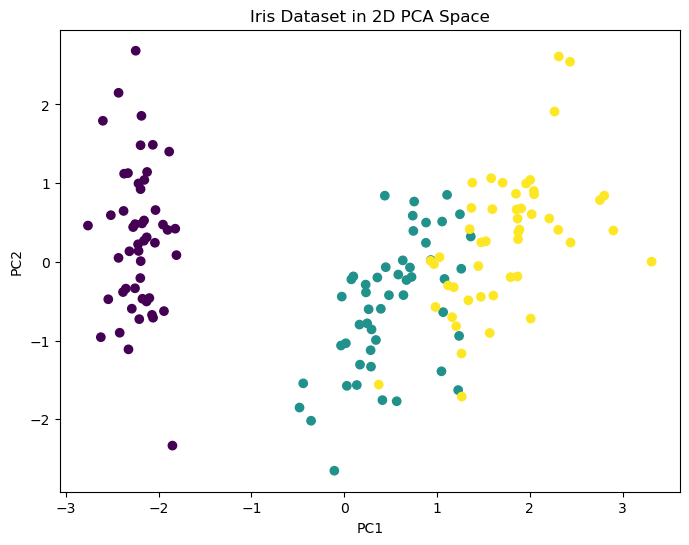

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df["PC1"], X_pca_df["PC2"], c=iris_df['target'], cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset in 2D PCA Space")
plt.show()